# Bounds on $\overline F$

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn
from scipy.optimize import fsolve

import main_1GnB as main

---
---
## Bounds on the fidelity

In [2]:
# x-axis
varying_param = 'x'
varying_array = np.linspace(0,1,50)

# Parameters
p_gen = 0.1
n = 5
F_new = 0.9
p_con = 0.5
Gamma = 1

savefig = True

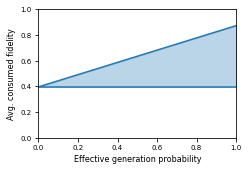

In [3]:
upp_vec = []
low_vec = []

for varying_value in varying_array:
    x = 1 - (1-p_gen)**n
    if varying_param == 'x':
        x = varying_value
    elif varying_param == 'p_gen':
        p_gen = varying_value
    elif varying_param == 'n':
        p_gen = varying_value
    elif varying_param == 'p_con':
        p_con = varying_value
    elif varying_param == 'Gamma':
        Gamma = varying_value
    
    gamma = np.exp(Gamma)-1
    
    upper_bound = (gamma/4 + F_new*p_con + (1-p_con)*(4*F_new/3+11/12)*x ) / (gamma+p_con)
    lower_bound = (gamma/4 + F_new*p_con) / (gamma+p_con)
    
    upp_vec += [upper_bound]
    low_vec += [lower_bound]
    
## PLOT ##
xfig = 9 # cm
yfig = 6 # cm
fontsize_labels = 8

# Plot
fig, ax = plt.subplots(figsize=(xfig/2.54, yfig/2.54))
plt.plot(varying_array, upp_vec, color='tab:blue')
plt.plot(varying_array, low_vec, color='tab:blue')
plt.fill_between(varying_array, upp_vec, low_vec,
                 color='tab:blue', alpha=0.3)
#plt.fill_between(varying_array, upp_vec, low_vec, hatch='//',
#                 color='None', edgecolor='tab:blue', alpha=0.2)

# Limits
plt.xlim([varying_array[0],varying_array[-1]])
plt.ylim([0,1])

# Labels and ticks
if varying_param == 'x':
    xlab = 'Effective generation probability'
elif varying_param == 'p_gen':
    xlab = 'Generation probability'
elif varying_param == 'n':
    xlab = 'Number of B memories'
elif varying_param == 'p_con':
    xlab = 'Probability of consumption'
elif varying_param == 'Gamma':
    xlab = r'Noise $\Gamma$'
plt.xlabel(xlab, fontsize=fontsize_labels)
plt.ylabel('Avg. consumed fidelity', fontsize=fontsize_labels)
ax.tick_params(labelsize=fontsize_labels-1)

if savefig:
    filename = 'figs/bounds-F-vs-%s-pgen%.3f-n%d-Fnew%.3f-pcon%.3f-G%.3f.pdf'%(varying_param,
                                                            p_gen, n, F_new, p_con, Gamma)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()

---
---
## Bounds on the fidelity for two different $\Gamma$

In [2]:
# x-axis
varying_param = 'x' #'n' #
varying_array = np.linspace(0,1,50) #np.arange(1,50) #

# Parameters
p_gen = 0.1
n = 5
F_new = 0.95
p_con = 0.7
Gamma1 = 0.1
Gamma2 = 1

savefig = True

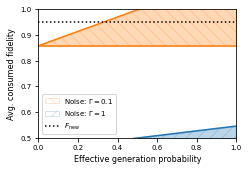

In [3]:
Gamma_vec = [Gamma1, Gamma2]
upp_vec = [[] for _ in Gamma_vec]
low_vec = [[] for _ in Gamma_vec]

for idx_Gamma, Gamma in enumerate(Gamma_vec):
    for varying_value in varying_array:
        if varying_param == 'x':
            x = varying_value
        elif varying_param == 'p_gen':
            p_gen = varying_value
            x = 1 - (1-p_gen)**n
        elif varying_param == 'n':
            n = varying_value
            x = 1 - (1-p_gen)**n
        elif varying_param == 'p_con':
            p_con = varying_value

        gamma = np.exp(Gamma)-1

        # Old upper bound
        #upper_bound = (gamma/4 + F_new*p_con + (1-p_con)*(4*F_new/3+11/12)*x ) / (gamma+p_con)
        upper_bound = (gamma/4 + F_new*p_con + (1-p_con)*(3/4)*x ) / (gamma+p_con)
        lower_bound = (gamma/4 + F_new*p_con) / (gamma+p_con)

        upp_vec += [upper_bound]
        low_vec += [lower_bound]

        upp_vec[idx_Gamma] += [upper_bound]
        low_vec[idx_Gamma] += [lower_bound]
    
## PLOT ##
xfig = 9 # cm
yfig = 6 # cm
fontsize_labels = 8
colors = ['tab:orange', 'tab:blue']
hatches = ['\\\\', '//']

# Plot
fig, ax = plt.subplots(figsize=(xfig/2.54, yfig/2.54))
for idx_Gamma, Gamma in enumerate(Gamma_vec):
    plt.plot(varying_array, upp_vec[idx_Gamma], color=colors[idx_Gamma])
    plt.plot(varying_array, low_vec[idx_Gamma], color=colors[idx_Gamma])
    plt.fill_between(varying_array, upp_vec[idx_Gamma], low_vec[idx_Gamma],
                     color=colors[idx_Gamma], alpha=0.3)
    plt.fill_between(varying_array, upp_vec[idx_Gamma], low_vec[idx_Gamma], hatch=hatches[idx_Gamma],
                     color='None', edgecolor=colors[idx_Gamma], alpha=0.2,
                     label=r'Noise: $\Gamma=$%s'%Gamma)
plt.plot([varying_array[0],varying_array[-1]], [F_new, F_new], ':', color='k', label=r'$F_\mathrm{new}$')

# Limits
plt.xlim([varying_array[0],varying_array[-1]])
plt.ylim([0.5,1])

# Labels and ticks
if varying_param == 'x':
    xlab = 'Effective generation probability'
elif varying_param == 'p_gen':
    xlab = 'Generation probability'
elif varying_param == 'n':
    xlab = 'Number of B memories'
elif varying_param == 'p_con':
    xlab = 'Probability of consumption'
elif varying_param == 'Gamma':
    xlab = r'Noise $\Gamma$'

plt.xlabel(xlab, fontsize=fontsize_labels)
plt.ylabel('Avg. consumed fidelity', fontsize=fontsize_labels)
ax.tick_params(labelsize=fontsize_labels-1)
plt.legend(fontsize=fontsize_labels-1)

if savefig:
    if varying_param == 'x':
        filename = 'figs/bounds-F-vs-%s-Fnew%.3f-pcon%.3f.pdf'%(varying_param, F_new, p_con)
    elif varying_param == 'n':
        filename = 'figs/bounds-F-vs-%s-pgen%.3f-Fnew%.3f-pcon%.3f.pdf'%(varying_param,
                                                            p_gen, F_new, p_con)
    else:
        filename = 'figs/bounds-F-vs-%s-pgen%.3f-n%d-Fnew%.3f-pcon%.3f.pdf'%(varying_param,
                                                            p_gen, n, F_new, p_con)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()